In [1]:
from pathlib import Path
import numpy as np

In [2]:
tzr_speeds = np.array([])
hf_speeds = np.array([])
st_speeds = np.array([])

for fp in Path(".").glob("./opt-results/tzr_times_*.npy"):
    tzr_speeds = np.append(tzr_speeds, np.load(fp))

for fp in Path(".").glob("./opt-results/hf_times_*.npy"):
    hf_speeds = np.append(hf_speeds, np.load(fp))
    
for fp in Path(".").glob("./opt-results/st_times_*.npy"):
    st_speeds = np.append(st_speeds, np.load(fp))


print("Average tzr time:", np.mean(tzr_speeds))
print("Average hf time:", np.mean(hf_speeds))
print("Average st time:", np.mean(st_speeds))

Average tzr time: 20.705527975559235
Average hf time: 39.29645833015442
Average st time: 24.895887179374697


In [3]:
#!pip install matplotlib

In [4]:
import matplotlib.pyplot as plt

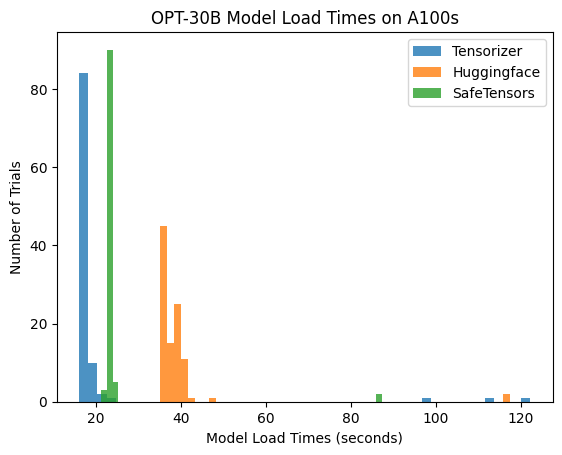

TZR Mean:	 20.705527975559235
HF Mean:	 39.29645833015442
ST Mean:	 24.895887179374697
TZR Quantiles (25%, 50%, 90%, 99%):	 [ 17.41470182  17.65525103  19.76171534 112.7714566 ]
HF Quantiles (25%, 50%, 90%, 99%):	 [ 36.26215398  36.74894166  40.15779512 116.81011237]
ST Quantiles (25%, 50%, 90%, 99%):	 [23.57428175 23.64808524 23.85324802 87.22340716]


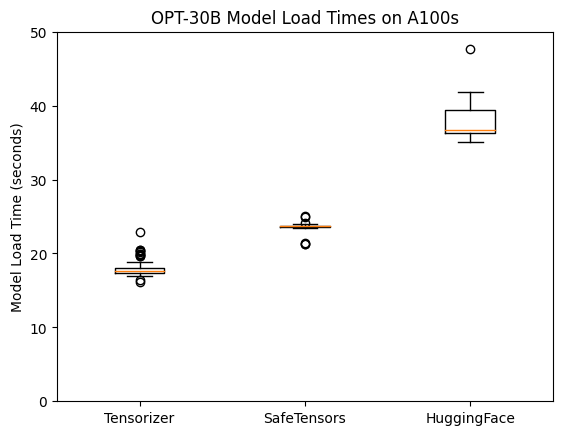

In [5]:
plt.hist(tzr_speeds, bins=50, label="Tensorizer", alpha=0.8)
plt.hist(hf_speeds, bins=50, label="Huggingface", alpha=0.8)
plt.hist(st_speeds, bins=50, label="SafeTensors", alpha=0.8)
plt.legend()
plt.xlabel("Model Load Times (seconds)")
plt.ylabel("Number of Trials")
plt.title("OPT-30B Model Load Times on A100s")
plt.show()
print("TZR Mean:\t", np.mean(tzr_speeds))
print("HF Mean:\t", np.mean(hf_speeds))
print("ST Mean:\t", np.mean(st_speeds))
print("TZR Quantiles (25%, 50%, 90%, 99%):\t", np.percentile(tzr_speeds, [25, 50, 90, 99]))
print("HF Quantiles (25%, 50%, 90%, 99%):\t", np.percentile(hf_speeds, [25, 50, 90, 99]))
print("ST Quantiles (25%, 50%, 90%, 99%):\t", np.percentile(st_speeds, [25, 50, 90, 99]))

plt.boxplot([tzr_speeds, st_speeds, hf_speeds])
plt.xticks(ticks=[1, 2, 3], labels=["Tensorizer", "SafeTensors", "HuggingFace"])
plt.ylabel("Model Load Time (seconds)")
plt.ylim((0, 50))
plt.title("OPT-30B Model Load Times on A100s")
plt.show()